# Summary on available functions

(Just for help)

Mathematical functions:
* deriv(xx_tab, ff_tab)
* integral(xx_tab, ff_tab, F0=0.0)

Useful Python functions
* fill_list_series(value_0, value_max, delta_value)
* calc_func_list(value_list, func)
* find_ind(tab, value)
* find_max_ind(tab)
* find_min_ind(tab)

1D:
Displacement and distance covered:
* calc_displacement_1D(x_tab)
* calc_distance_covered_1D(x_tab)

2D:
* calc_abs_2D(xc_tab, yc_tab)
* calc_displacement_2D(x_tab, y_tab)
* calc_distance_covered_2D(x_tab, y_tab)

In [4]:
!wget https://github.com/zoldbirka/colab-eng-phys/raw/refs/heads/main/twodkinematics.py
# Make sure twodkinematics.py is downloaded and copied next to this file!
# Or copy all functions from template-kinem-2d.ipynb at the start!

--2024-11-06 15:25:08--  https://github.com/zoldbirka/colab-eng-phys/raw/refs/heads/main/twodkinematics.py
github.com (github.com) feloldása… 140.82.121.3
Csatlakozás a következőhöz: github.com (github.com)[140.82.121.3]:443… kapcsolódva.
HTTP kérés elküldve, várakozás válaszra… 302 Found
Hely: https://raw.githubusercontent.com/zoldbirka/colab-eng-phys/refs/heads/main/twodkinematics.py [következik]
--2024-11-06 15:25:09--  https://raw.githubusercontent.com/zoldbirka/colab-eng-phys/refs/heads/main/twodkinematics.py
raw.githubusercontent.com (raw.githubusercontent.com) feloldása… 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Csatlakozás a következőhöz: raw.githubusercontent.com (raw.githubusercontent.com)[185.199.109.133]:443… kapcsolódva.
HTTP kérés elküldve, várakozás válaszra… 200 OK
Hossz: 9149 (8,9K) [text/plain]
Mentés ide: „twodkinematics.py.3”

twodkinematics.py.3 100%[===================>]   8,93K  --.-KB/s    idő 0,001s 

2024-11-06 15:25:11 (15,7 MB/s) -- „twodkinemat

In [5]:
# importing modules
import math   # math functions
import matplotlib.pyplot as plt  # graph plot
%matplotlib inline

## Solution with pre written 'kinematics.py'
from twodkinematics import*

# 2D Examples - Rotating rocket problem

We start a small rocket in space, far from everything, with 0 initial velocity. The rocket has fuel for 100 s long, $a=0.3\operatorname{m/s^2}$ magnitude acceleration. Something went wrong, and the rocket started to spin with a constant $\beta=0.05\operatorname{1/s^2}$ angular acceleration. 

Due to the spin, the direction of the acceleration vector will change according to the $\alpha(t)=\beta/2\cdot t^2$ function.

1) Plot the position, velocity and acceleration coordinates as a function of time.

2) Plot the path of the rocket.

3) What is the maximum speed and when it is reached?

4) When will the rocket be 100 m distance from the original position?

5) What is the total distance covered at the previous time?

## Zeroth step: set the coordinate system

Origin at the start point.

x points horizontally in the direction of initial direction.

y point upwards.

## First step: calculate kinematics

In [54]:
# input data as variables
beta = 0.05  # 1/s^2
amag = 0.3   # m/s^2
t_max = 100.00 #s

#initial velocity (We start from rest)
vx0 = 0.0    #m/s
vy0 = 0.0    #m/s

#initial position (We start from origin)
x0 = 0.0    #m
y0 = 0.0    #m

In [55]:
# my ax(t) and ay(t) functions
def my_axt(t):
    return amag*math.cos(beta/2*t**2)

def my_ayt(t):
    return amag*math.sin(beta/2*t**2)

In [56]:
# Let's define the time values:
t_tab = fill_list_series(0.0, t_max, 0.001)  # fill_list_series : see in 'twodkinematics.py'
N = len(t_tab) # Number of time values
print("Number of data:",N)

# calculate accelerations
ax_tab = calc_func_list(t_tab, my_axt)   # calc_func_list : see in "twodkinematics.py'
ay_tab = calc_func_list(t_tab, my_ayt) 

Number of data: 100002


In [57]:
print("ax:", ax_tab[-10:])
print("ay:", ay_tab[-10:])

ax: [0.06059590141673542, 0.0620641102911687, 0.06353078245864001, 0.06499588121004327, 0.06645936987382038, 0.0679212118168638, 0.06938137044535193, 0.07083980920570031, 0.07229649158557759, 0.07375138111468048]
ay: [-0.2938165018025592, -0.2935098741333341, -0.2931959066566124, -0.2928746070005557, -0.2925459829769924, -0.2922100425812377, -0.2918667939919251, -0.2915162455708086, -0.2911584058625416, -0.29079328359451]


In [58]:
# a --> v --> x calculation

# velocity with integral 
vx_tab = integral(t_tab, ax_tab, vx0)  # don't forget initial velocity!
vy_tab = integral(t_tab, ay_tab, vy0)

# position with integral 
x_tab = integral(t_tab, vx_tab, x0)     # don't forget initial position!
y_tab = integral(t_tab, vy_tab, y0)

In [59]:
# print some values to check
# Use the copy and change it intelligently

print("x:", x_tab[-10:])
print("y:", y_tab[-10: ])
print("vx:", vx_tab[-10: ])
print("vy:", vy_tab[-10: ])

x: [118.88795335296697, 118.88908359040448, 118.89021388990572, 118.89134425293736, 118.89247468096445, 118.89360517545053, 118.8947357378574, 118.89586636964519, 118.89699707227237, 118.8981278471956]
y: [112.90207527473322, 112.90325212365947, 112.9044286790777, 112.90560494130186, 112.90678091065323, 112.90795658746045, 112.90913197205946, 112.91030706479349, 112.9114818660131, 112.91265637607614]
vx: [1.13020677251397, 1.1302681025198233, 1.1303308999661985, 1.1303951632980331, 1.1304608909235745, 1.13052808121442, 1.1305967325055515, 1.1306668430953764, 1.1307384112457723, 1.1308114351821228]
vy: [1.1769957578585892, 1.1767020946706241, 1.1764087417802278, 1.1761157065233978, 1.1758229962284117, 1.175530618215631, 1.175238579797343, 1.1749468882775644, 1.1746555509518464, 1.1743645751071166]


## Plot the position, velocity and acceleration coordinates as a function of time

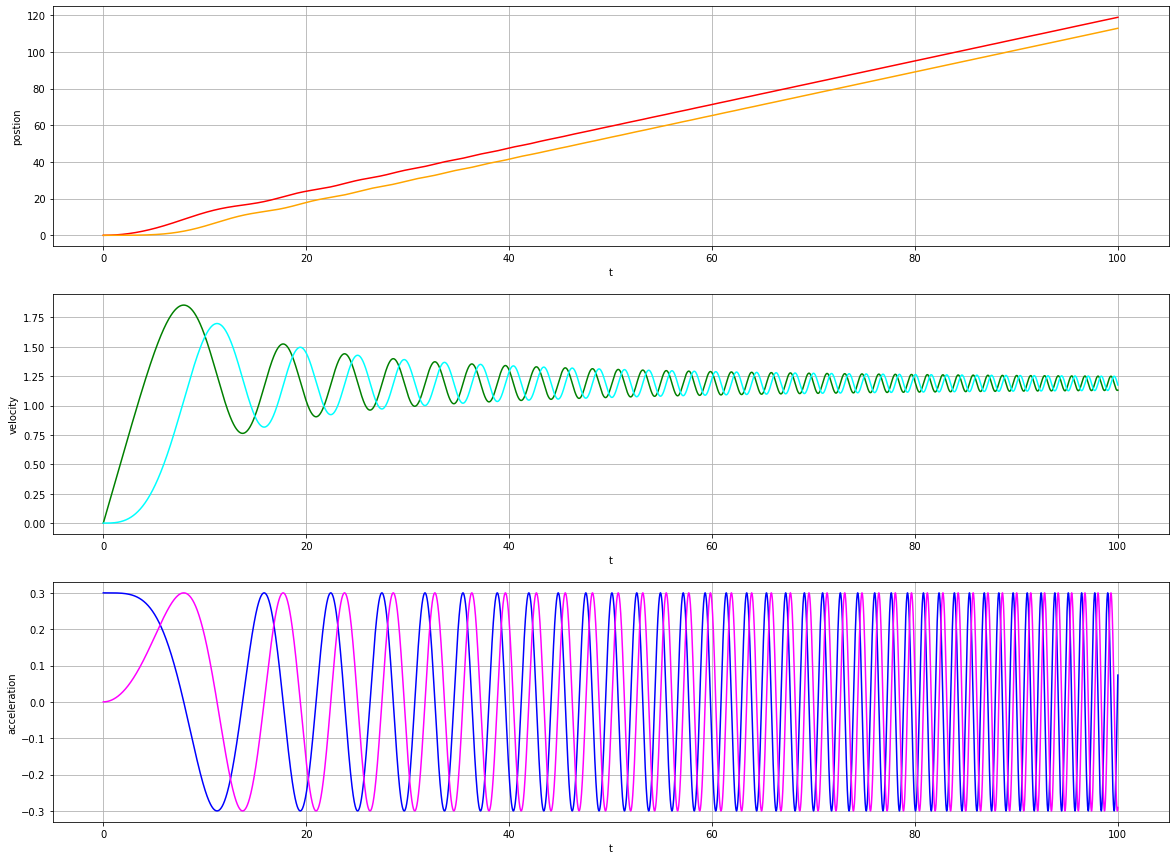

In [60]:
# It is a simple example of plotting. 
# Use the copy of it and change intelligently to plot what you want. 
# Sometimes just putting and deleting '#' character for deactivating or activating sepcific parts is enough

t_range=[0.0, 10.0]    # for a specific range. PLAY WITH END TIME!

# initialize plot routine
fig=plt.figure(figsize=(20,15))  # plot size

# position of three sub-graphs
ax1=fig.add_subplot(311) 
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)

# setting of horizontal axes
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel("t") # set the label
#    ax.set_xlim(t_range) # set the min and max values; comment it out if neccessary
    ax.grid()    # draw a grey grid 

# content of graphs
ax1.set_ylabel("postion")
ax1.plot(t_tab, x_tab, color="red") # x(t) with red
ax1.plot(t_tab, y_tab, color="orange") # y(t) with orange
ax2.set_ylabel("velocity")
ax2.plot(t_tab, vx_tab, color="green") # vx(t) with green
ax2.plot(t_tab, vy_tab, color="cyan") # vy(t) with cyan
ax3.set_ylabel("acceleration")
ax3.plot(t_tab, ax_tab, color="blue") # ax(t) with blue
ax3.plot(t_tab, ay_tab, color="magenta") # ay(t) with magenta

# plt.savefig(....)

## Plot the path of the rocket

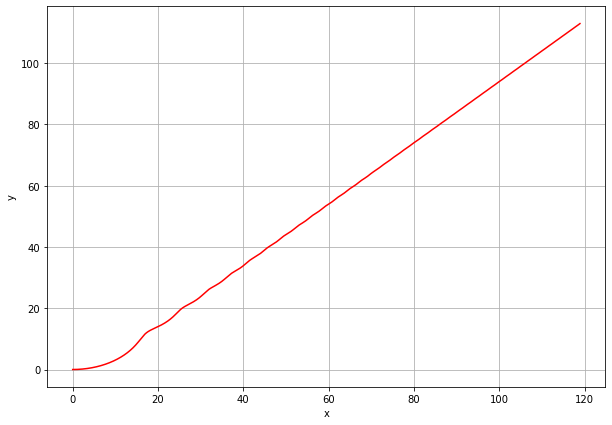

In [61]:
# Plot the path in x-y plane

fig = plt.figure(figsize=(10,7))  # plot size

# position of three sub-graphs
ax1 = fig.add_subplot(111) 

ax1.set_xlabel("x") # set the label
ax1.set_ylabel("y") # set the label
ax1.grid()    # draw a grey grid 

# content of graphs

ax1.plot(x_tab, y_tab, color="red")   # plot y over x


## What is the maxmimum speed and when it is reached?

In [64]:
# calculat speed for all elements of velocity tables
vabs_tab = calc_abs_2D(vx_tab, vy_tab)

# index is necessary as time is asked!
maxvabs_ind = find_max_ind(vabs_tab)
# print result
print("Maximum speed:")
print(f" -- time : {t_tab[maxvabs_ind]:.3f} s")
print(f" -- speed: {vabs_tab[maxvabs_ind]:.3f} m/s")

Maximum speed:
 -- time : 9.586 s
 -- speed: 2.257 m/s


## When will be the rocket at 100 m distance from the original position?

In [73]:
# 100 m distance from the original position: displacement = 100 m
displ_tab = []
for i in range(len(t_tab)):
    displ_tab.append((x_tab[i]**2+y_tab[i]**2)**0.5)

In [84]:
# search elemenet index
ind100 = find_ind(displ_tab, 100.0)

In [85]:
# one solution
print(ind100)

[61951]


In [86]:
print(f"The body will reach 100 m distance at {t_tab[ind100[0]]:.2f} s")

The body will reach 100 m distance at 61.95 s


In [77]:
# or create a new function to do the calculation 
def calc_lenght_of_displacement_2D(x_tab:list, y_tab:list):
    '''
    Usage:
    input: x_tab, y_tab
       tables of x and y coordinates
    output: displ_length_tab 
        table of displacement lenght relative to the start point

    Example usage: calculate displacement from the start point
        displ_lenght_tab = lenght_of_displacement_2D(x_tab, y_tab)
    '''
    displ_x_tab = calc_displacement_1D(x_tab)
    displ_y_tab = calc_displacement_1D(y_tab)

    displ_len_tab = []
    for i in range(len(x_tab)):
        displ_len_tab.append((displ_x_tab[i]**2 + displ_y_tab[i]**2)**0.5)
        
    return displ_len_tab

In [83]:
displ2_tab = calc_lenght_of_displacement_2D(x_tab, y_tab)
ind100 = find_ind(displ2_tab, 100.0)

print(f"The body will reach 100 m distance at {t_tab[ind100[0]]:.2f} s")


The body will reach 100 m distance at 61.95 s


# 2D Examples - Weaving car problem

A car is moving on a test road in the following way: 
* Initially, it moves on the centre line at 5 m/s speed.
* It starts to increase its speed with 0.5 m/s^2 acceleration continuously
* It starts to "weave" left-right by oscillating its velocity direction with alpha=15°*sin(1.1*t)
  
In other words: the speed increases linearly during the motion, but the direction of the velocity vector oscillates between -15° and +15° values with 1.1 Hz angular frequency.

Questions:
1) Plot the position, velocity and acceleration coordinates as a function of time
2) Plot the path of the car
3) Plot the magnitude of the acceleration as a function of time!
4) When and where will the magnitude of the acceleration reach 8 m/s^2 at first? 
5) What is the total distance covered at the previous time?
6) How wide a road is required for this test? (until the previous time)

## Zeroth step: set the coordinate system

Origin is the point where it starts to accelerate.

x points in the direction of the initial direction.


## First step: calculate kinematics

In [88]:
# input data
v_start = 5.0     # m/s
a = 0.5           # m/s^2
omega = 1.1       # 1/s
alpha0_deg = 15.0 # degree!!!

#initial velocity
vx0 = v_start    #m/s
vy0 = 0.0    #m/s

#initial position (We start from origin)
x0 = 0.0    #m
y0 = 0.0    #m

# converting angle to radians
alpha0 = math.radians(alpha0_deg)

# defining velocity functions
# my vx(t) and vy(t) functions
def my_vxt(t):
    return (v_start+a*t)*math.cos(alpha0*math.sin(omega*t))

def my_vyt(t):
    return (v_start+a*t)*math.sin(alpha0*math.sin(omega*t))

In [89]:
# Let's define the time values:
t_tab = fill_list_series(0.0, 100.0, 0.001)  # fill_list_series : see in "Definitions" section

# fill velocity tables
vx_tab = calc_func_list(t_tab, my_vxt)
vy_tab = calc_func_list(t_tab, my_vyt)

# kinematic calculations for accelaration and position
ax_tab = deriv(t_tab, vx_tab)
ay_tab = deriv(t_tab, vy_tab)
x_tab = integral(t_tab, vx_tab, x0)
y_tab = integral(t_tab, vy_tab, y0)

## 1) Plot the position, velocity and acceleration coordinates as a function of time

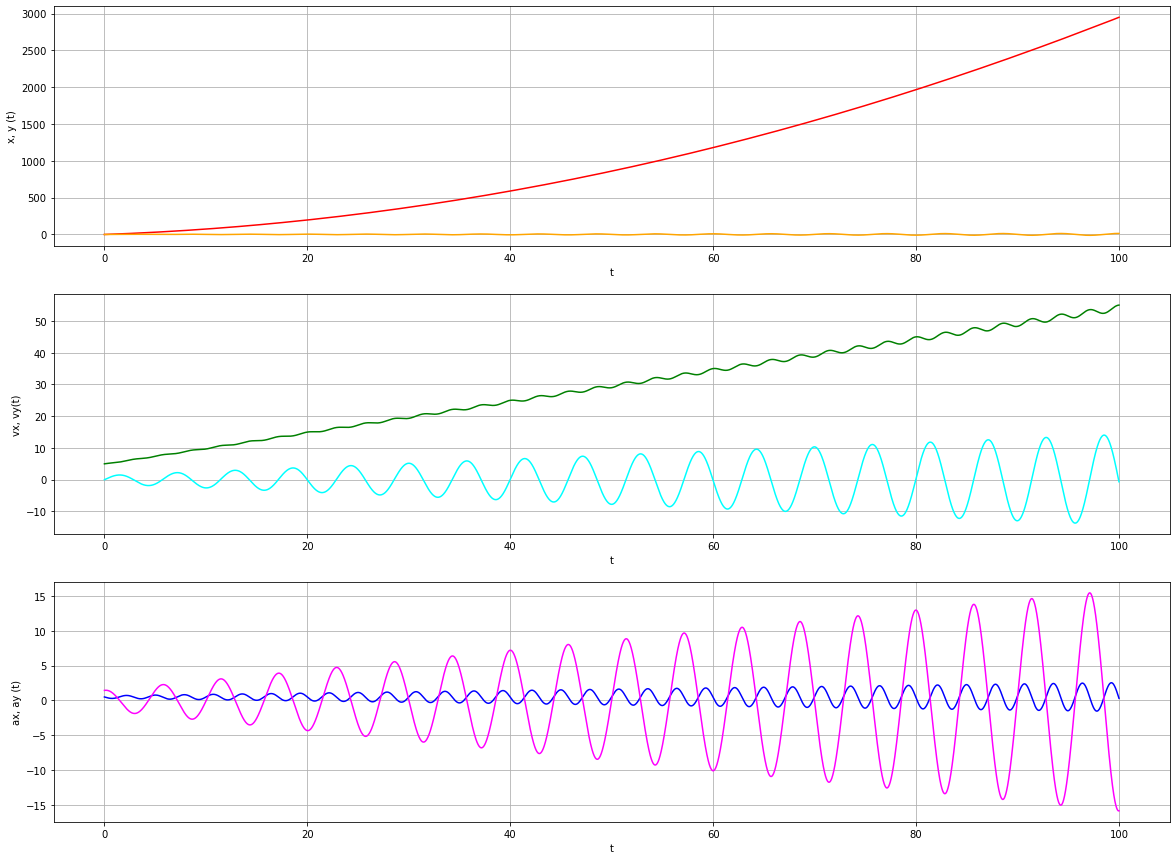

In [90]:
# initialize plot routine
fig=plt.figure(figsize=(20,15))  # plot size

# position of three sub-graphs
ax1=fig.add_subplot(311) 
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)

# setting of horizontal axes
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel("t") # set the label
    ax.grid()    # draw a grey grid 

# content of graphs
ax1.set_ylabel("x, y (t)")
ax1.plot(t_tab, x_tab, color="red") # x(t) with red
ax1.plot(t_tab, y_tab, color="orange") # y(t) with orange
ax2.set_ylabel("vx, vy(t)")
ax2.plot(t_tab, vx_tab, color="green") # vx(t) with green
ax2.plot(t_tab, vy_tab, color="cyan") # vy(t) with cyan
ax3.set_ylabel("ax, ay (t)")
ax3.plot(t_tab, ax_tab, color="blue") # ax(t) with blue
ax3.plot(t_tab, ay_tab, color="magenta") # ay(t) with magenta

## 2) Plot the path of the car

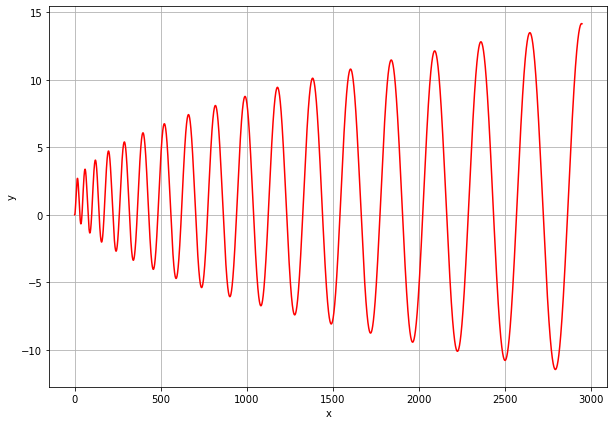

In [103]:
# Plot the path in x-y plane

fig = plt.figure(figsize=(10,7))  # plot size

# position of three sub-graphs
ax1=fig.add_subplot(111) 

ax1.set_xlabel("x") # set the label
ax1.set_ylabel("y") # set the label
ax1.grid()    # draw a grey grid 

# content of graphs

ax1.plot(x_tab, y_tab, color="red")   # plot y over x

## 3) Plot the magnitude of the acceleration as a function of time!

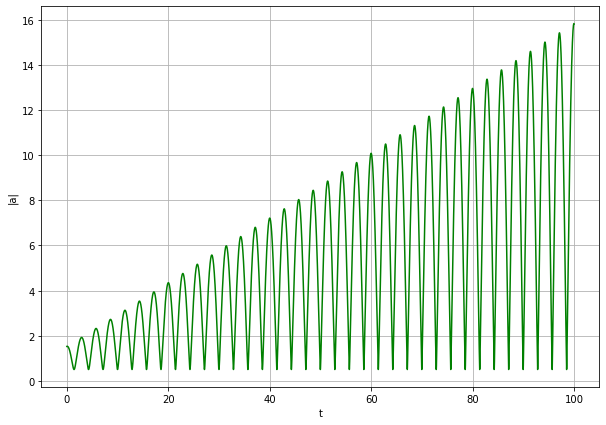

In [99]:
aabs_tab = calc_abs_2D(ax_tab, ay_tab)

fig=plt.figure(figsize=(10,7))  # plot size

ax1=fig.add_subplot(111) 

ax1.set_xlabel("t") # set the label
ax1.set_ylabel("|a|") # set the label
ax1.grid()    # draw a grey grid 

ax1.plot(t_tab, aabs_tab, color="green")


## 4) When and where will the magnitude of the acceleration reach 8 m/s^2 at first? 

In [96]:
# search element index in accelaration magnitude list
a8_ind = find_ind(aabs_tab, 8.0)

In [98]:
# more solutions, but the first one is interesting
reach8_ind = a8_ind[0]

print("The car reached 8 m/s^2 at first:")
print(f"  - at t = {t_tab[reach8_ind]:.2f} s")
print(f"  - at x = {x_tab[reach8_ind]:.2f}, y = {y_tab[reach8_ind]:.2f} m coordinates.")

The car reached 8 m/s^2 at first:
  - at t = 45.62 s
  - at x = 735.70, y = -5.38 m coordinates.


## 5) What is the total distance covered at the previous time?

In [100]:
# calculate distance covered:
distcov_tab = calc_distance_covered_2D(x_tab, y_tab)

In [101]:
print("Path length at the previous time: %5.2f m"%(distcov_tab[reach8_ind]))

Path length at the previous time: 748.51 m


## 6) How wide a road is required for this test? (until the previous time)

In [102]:
# calculate minimum and maximum y from 0 to this point

y_max = y_tab[find_max_ind(y_tab[0:reach8_ind])]
y_min = y_tab[find_min_ind(y_tab[0:reach8_ind])]

width = max(y_max, -y_min)*2

print(f"Required road width = {width:.2f} m")

Required road width = 14.84 m
